In [1]:
import pandas as pd
import numpy as np
import json
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

train_df= pd.read_csv('../data/adult.data',names=columns)

In [6]:
test_df = pd.read_csv('../data/adult.test',names = columns)

In [7]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
target_variable = "income"
target_value = ">50K"

In [63]:
df = train_df.append(test_df).copy()

In [64]:
def convert_object_type_to_category(df):
    """Converts columns of type object to category."""
    df = pd.concat([df.select_dtypes(include=[], exclude=['object']),
                  df.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
                  ], axis=1).reindex(df.columns, axis=1)
    return df

In [65]:
df = convert_object_type_to_category(df)

In [66]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
df.to_csv('../data/adult_raw.csv')

In [68]:
# ' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
#  ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
#  ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'

In [69]:
edu_dict = {' 11th': 'high-school', ' 9th':'high-school',' 7th-8th':'prim-middle-school', \
           ' 5th-6th':'prim-middle-school', ' 10th':'high-school', ' 1st-4th':'prim-middle-school', \
           ' Preschool':'prim-middle-school', ' 12th':'high-school',' Bachelors':'Bachelors',' HS-grad':'HS-grad',\
           ' Masters':'Masters',' Some-college':'Some-college',' Assoc-acdm':'Assoc-acdm',' Assoc-voc':'Assoc-voc',\
           ' Doctorate':'Doctorate',' Prof-school': 'Prof-school'}
race_dict = {' Black':'Black',' White':'White'}
sex_dict = {' Male':'Male', ' Female':'Female'}
native_dict = {' United-States':'US'}
marital_dict = {' Never-married':'unmarried', ' Married-civ-spouse':'married'}
income_dict = {' <=50K':'<=50K', ' >50K':'>50K', ' <=50K.':'<=50K', ' >50K.':'>50K'}

df['education'] = df.apply(lambda x: edu_dict[x['education']] if x['education'] in edu_dict.keys() else 'Other',axis=1).astype('category')
df['race'] = df.apply(lambda x: race_dict[x['race']] if x['race'] in race_dict.keys() else 'Other', axis=1).astype('category')
df['sex'] = df.apply(lambda x: sex_dict[x['sex']] if x['sex'] in sex_dict.keys() else 'Other', axis=1).astype('category')
df['native-country'] = df.apply(lambda x: native_dict[x['native-country']] if x['native-country'] in native_dict.keys()\
                               else 'Non-US', axis=1).astype('category')
df['marital-status'] = df.apply(lambda x: marital_dict[x['marital-status']] if x['marital-status'] in marital_dict.keys()\
                               else 'Other', axis=1).astype('category')
df['income'] = df.apply(lambda x: income_dict[x['income']],axis=1).astype('category')

In [70]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,US,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,US,<=50K
2,38,Private,215646,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,US,<=50K
3,53,Private,234721,high-school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,US,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Non-US,<=50K


In [73]:
df = convert_object_type_to_category(df)

In [77]:
df.to_csv('../data/adult_preproc.csv')

In [75]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,US,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,US,<=50K
2,38,Private,215646,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,US,<=50K
3,53,Private,234721,high-school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,US,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Non-US,<=50K


In [76]:
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [State-gov, Self-emp-not-inc, Private, Federal-gov, ..., ?, Self-emp-inc, Without-pay, Never-worked]
[Bachelors, HS-grad, high-school, Masters, Some-college, Assoc-acdm, Assoc-voc, prim-middle-school, Doctorate, Prof-school]
Categories (10, object): [Bachelors, HS-grad, high-school, Masters, ..., Assoc-voc, prim-middle-school, Doctorate, Prof-school]
[unmarried, married, Other]
Categories (3, object): [unmarried, married, Other]
[Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, ..., Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv]
Length: 15
Categories (15, object): [Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, ..., ?, Protective-serv, Armed-Forces, Priv-house-serv]
[Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative]
Categories (6, object): [Not-in-family, Husband, Wife, O

In [80]:
df_pre = df.copy()
mar_map = {'unmarried':0.0, 'married':1.0, 'Other':2.0}
race_map = {'Black':1.0,'White':0.0,'Other':2.0}
sex_map = {'Female':1.0,'Male':0.0}
inc_map = {'<=50K':0, '>50K':1}
nat_map = {'US':1.0, 'Non-US':0.0}

df_pre['marital-status'] = df_pre.apply(lambda x: mar_map[x['marital-status']],axis=1)
df_pre['race'] = df_pre.apply(lambda x: race_map[x['race']],axis=1)
df_pre['sex'] = df_pre.apply(lambda x: sex_map[x['sex']],axis=1)
df_pre['income'] = df_pre.apply(lambda x: inc_map[x['income']],axis=1)
df_pre['native-country'] = df_pre.apply(lambda x: nat_map[x['native-country']],axis=1)

In [81]:
df_pre.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,0.0,Adm-clerical,Not-in-family,0.0,0.0,2174,0,40,1.0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,Husband,0.0,0.0,0,0,13,1.0,0
2,38,Private,215646,HS-grad,9,2.0,Handlers-cleaners,Not-in-family,0.0,0.0,0,0,40,1.0,0
3,53,Private,234721,high-school,7,1.0,Handlers-cleaners,Husband,1.0,0.0,0,0,40,1.0,0
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,Wife,1.0,1.0,0,0,40,0.0,0


In [82]:
def make_dummy(df, cat_attrs):
    df_tmp = df.copy()
    dmvar = pd.get_dummies(df,columns=cat_attrs,drop_first=True)
    df_tmp = pd.concat([df_tmp,dmvar],axis=1)
    df_tmp = df_tmp.drop(cat_attrs,axis=1)
    return df_tmp

In [87]:
cat_attrs =['workclass','education','occupation','relationship']
df_tmp = make_dummy(df_pre,cat_attrs)

In [88]:
df_tmp.head()

,age,fnlwgt,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,77516,13,0.0,0.0,0.0,2174,0,40,1.0,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,13,1.0,0.0,0.0,0,0,13,1.0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,2.0,0.0,0.0,0,0,40,1.0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,1.0,1.0,0.0,0,0,40,1.0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,13,1.0,1.0,1.0,0,0,40,0.0,...,1,0,0,0,0,0,0,0,0,1


In [89]:
df_tmp.to_csv('../data/adult_proc.csv')

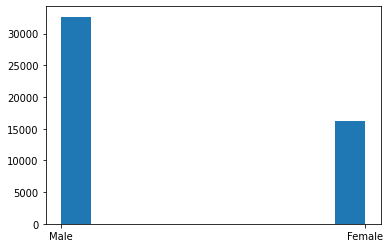

In [91]:
plt.hist(df['sex'])
plt.show()

In [32]:
print(df['occupation'])

0              Adm-clerical
1           Exec-managerial
2         Handlers-cleaners
3         Handlers-cleaners
4            Prof-specialty
                ...        
16276        Prof-specialty
16277                     ?
16278        Prof-specialty
16279          Adm-clerical
16280       Exec-managerial
Name: occupation, Length: 48842, dtype: object


In [1]:
from load_data import *

In [2]:
Xtr, Xte, ytr, yte, Ztr, Zte = load_adult_data()

In [6]:
import numpy as np


(34189, 55)

In [7]:
uniX = np.unique(Xtr,axis=0)

In [8]:
uniX.shape

(34189, 55)